<a href="https://colab.research.google.com/github/JF11579/New-Stuff/blob/main/Job_recovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graphs

Warning message:
“Removed 8 rows containing missing values (position_stack).”


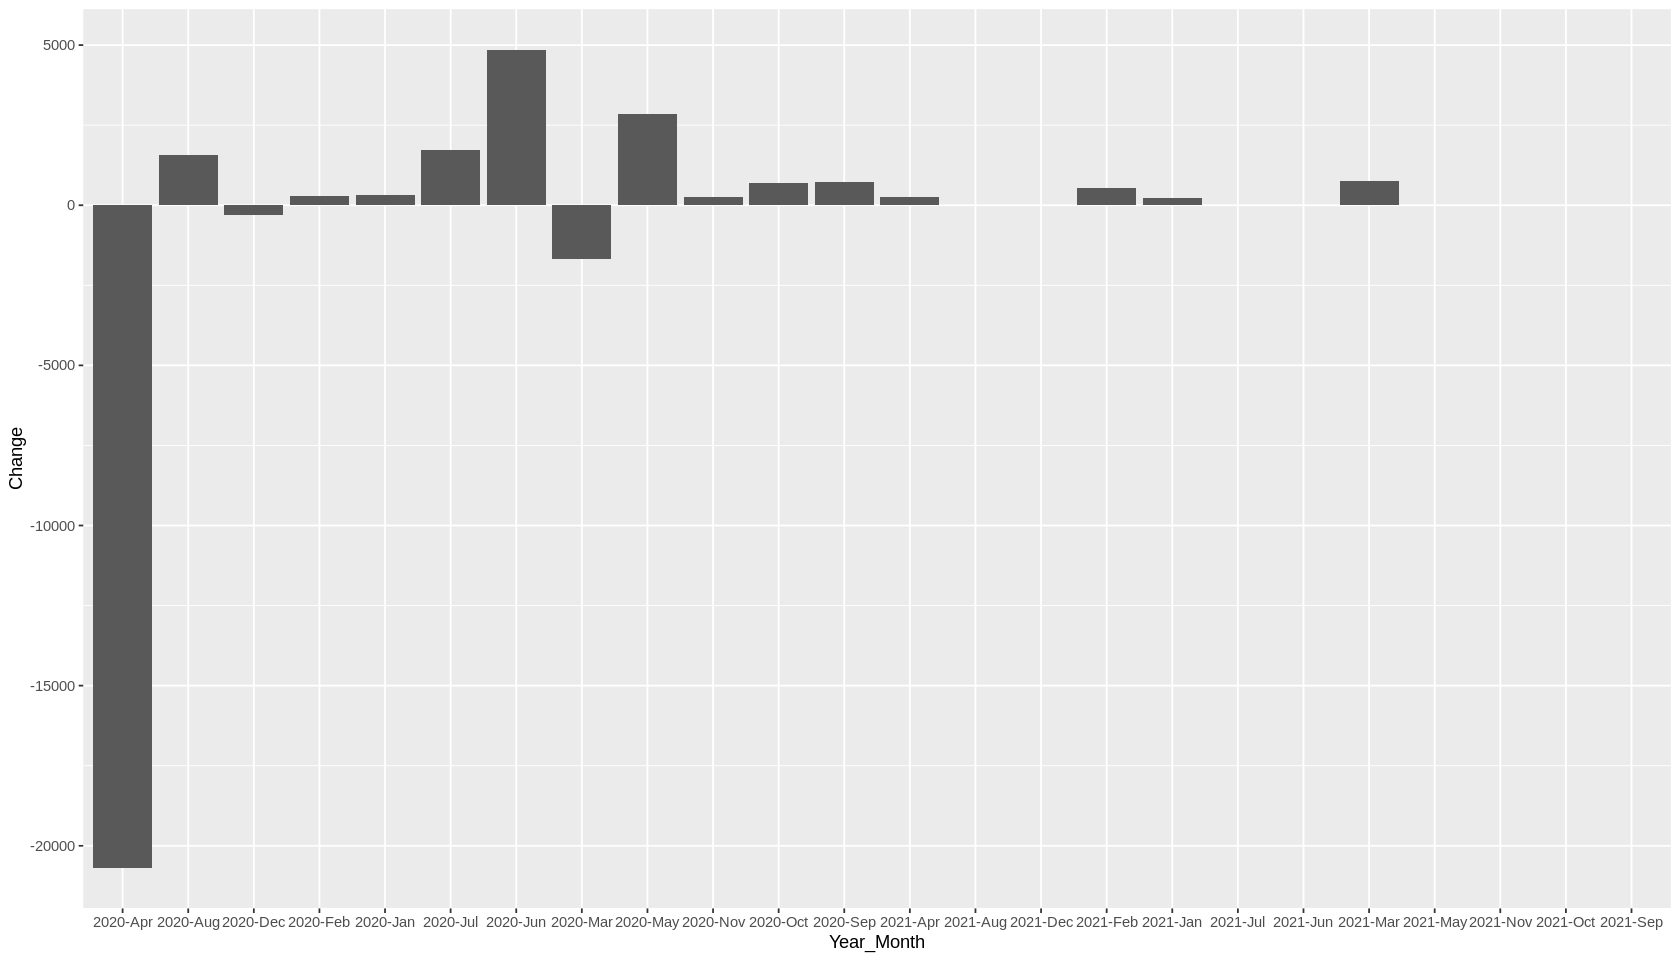

In [ ]:
job_change_graph_1 <- ggplot(data = recent_data,
                  aes( x = Year_Month , y = Change ))+
                  geom_bar(stat="identity")
job_change_graph_1    

Switch background to blue

switch bars to white

Warning message:
“Removed 8 rows containing missing values (position_stack).”


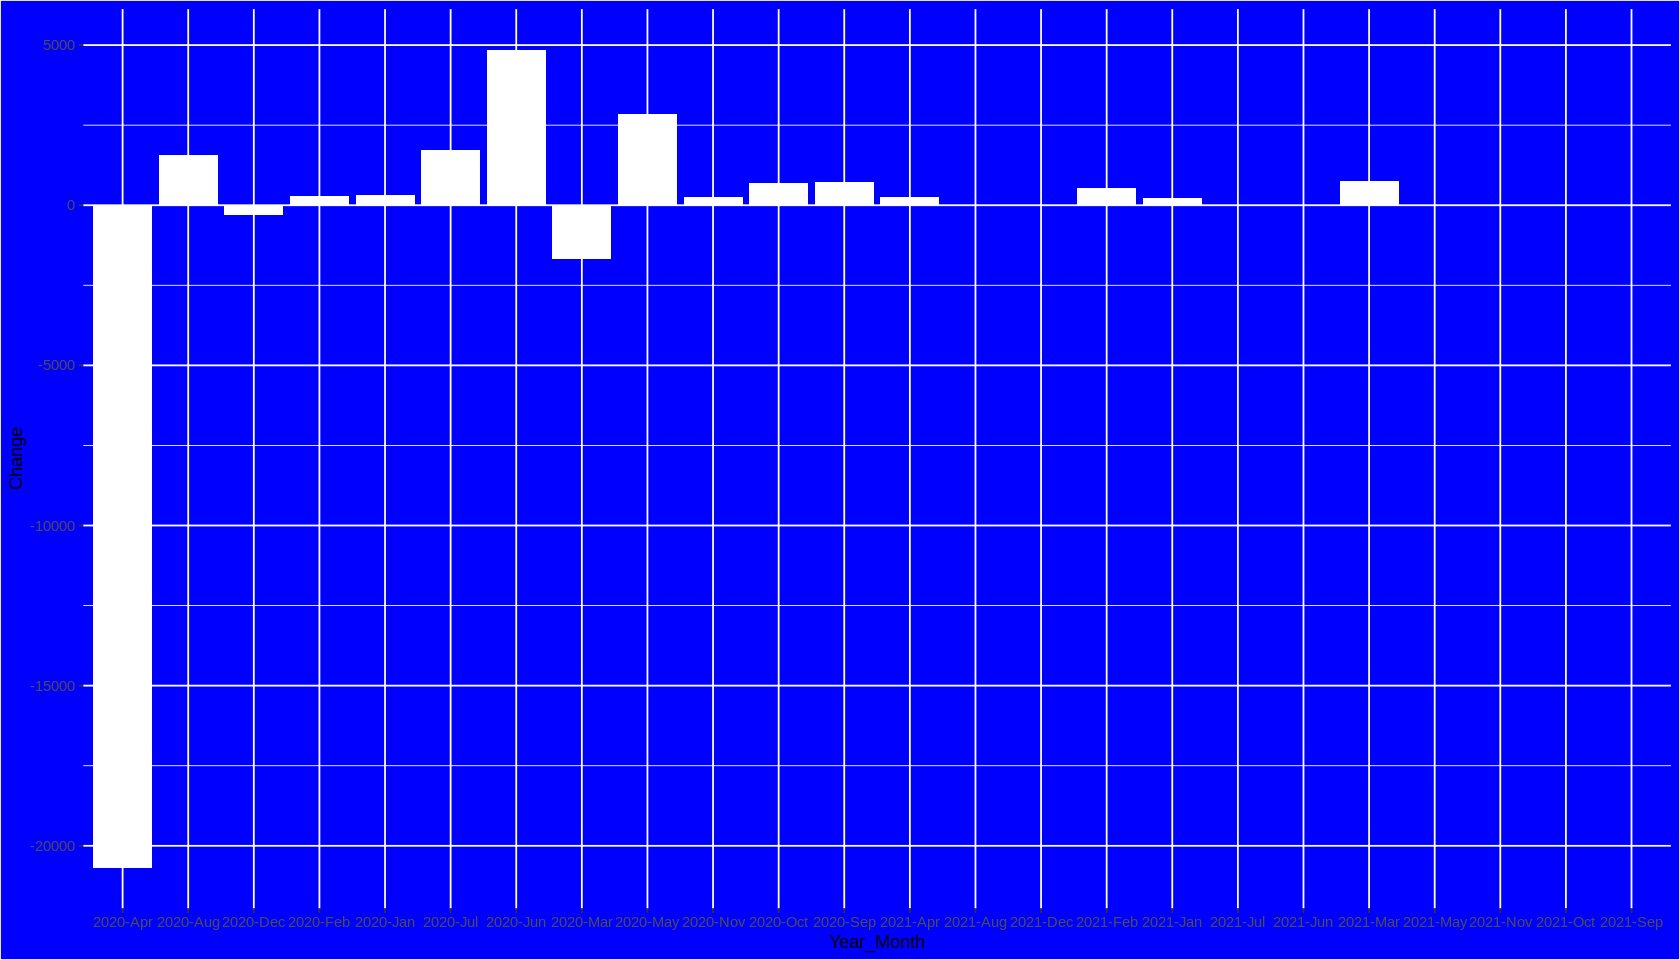

In [ ]:
job_change_graph_2 <- ggplot(data = recent_data,
                  aes( x = Year_Month , y = Change ))+
                  geom_bar(fill = "white" ,stat="identity")+
                  theme(plot.background = element_rect(fill = "blue"),
                      panel.background = element_rect(fill = "blue"))
job_change_graph_2 

rotate axis labesl

Warning message:
“Removed 8 rows containing missing values (position_stack).”


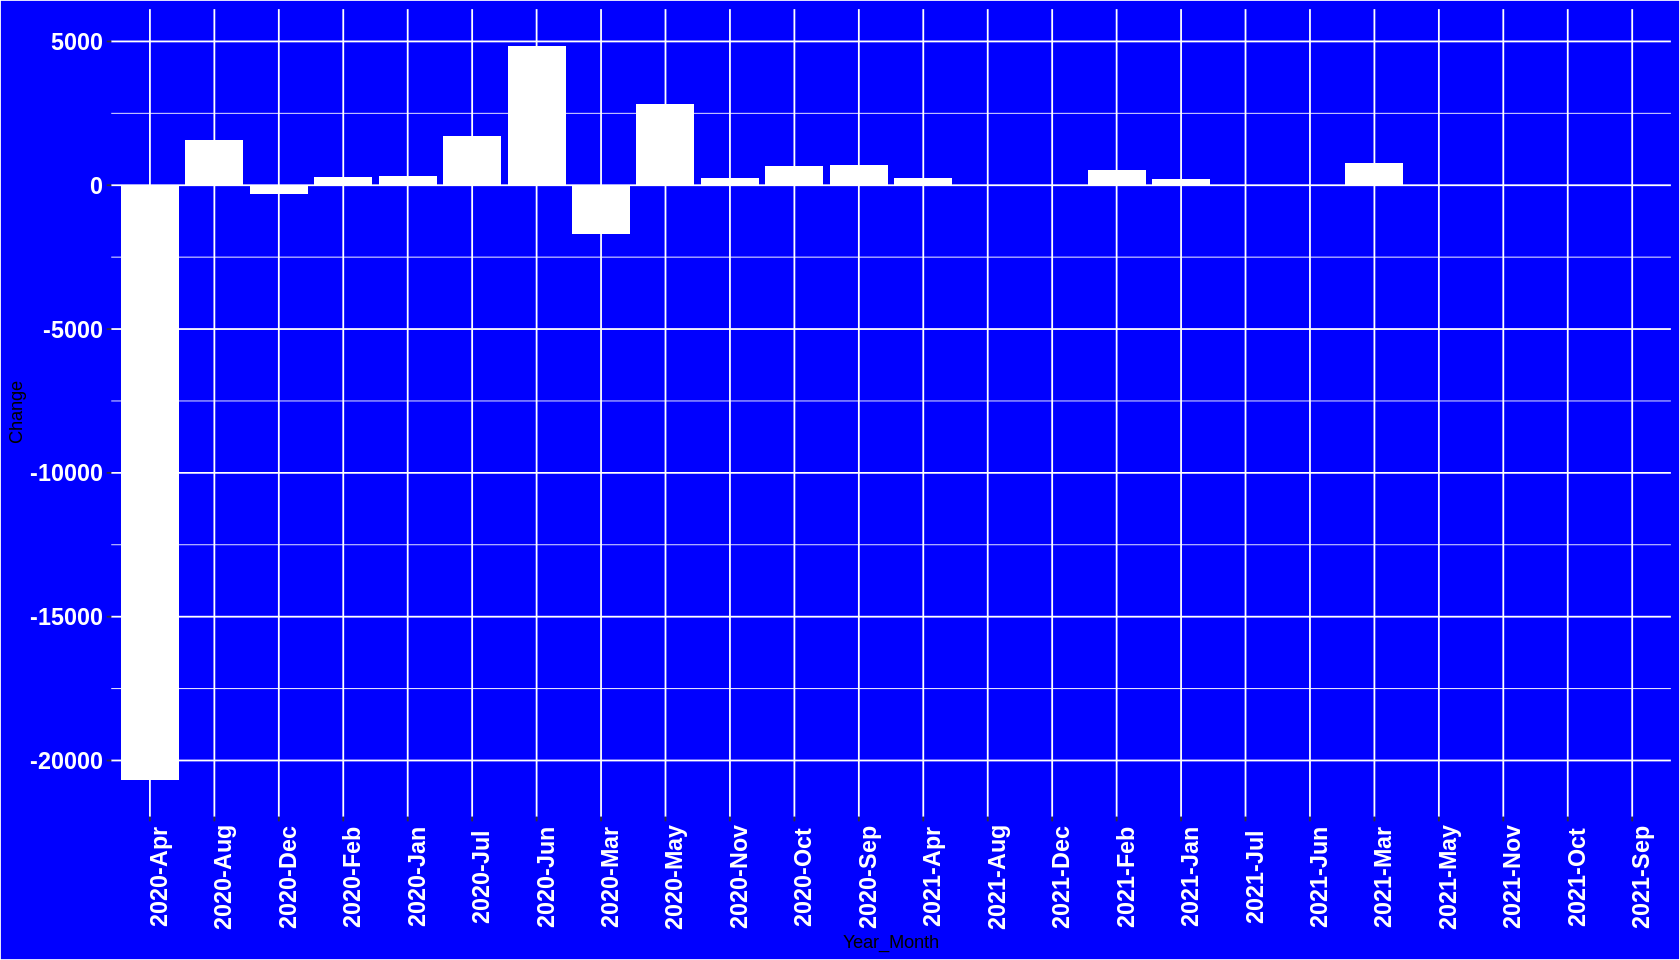

In [ ]:
job_change_graph_3 <- ggplot(data = recent_data,
                  aes( x = Year_Month , y = Change ))+
                  geom_bar(fill = "white" ,stat="identity")+
                  theme(plot.background = element_rect(fill = "blue"),
                      panel.background = element_rect(fill = "blue"))+
                      theme(axis.text.x = element_text(face="bold", color="white", 
                           size=14, angle=90),
          axis.text.y = element_text(face="bold", color="white", 
                           size=14, angle=0))
job_change_graph_3 

Remove the grid lines

Warning message:
“Removed 8 rows containing missing values (position_stack).”


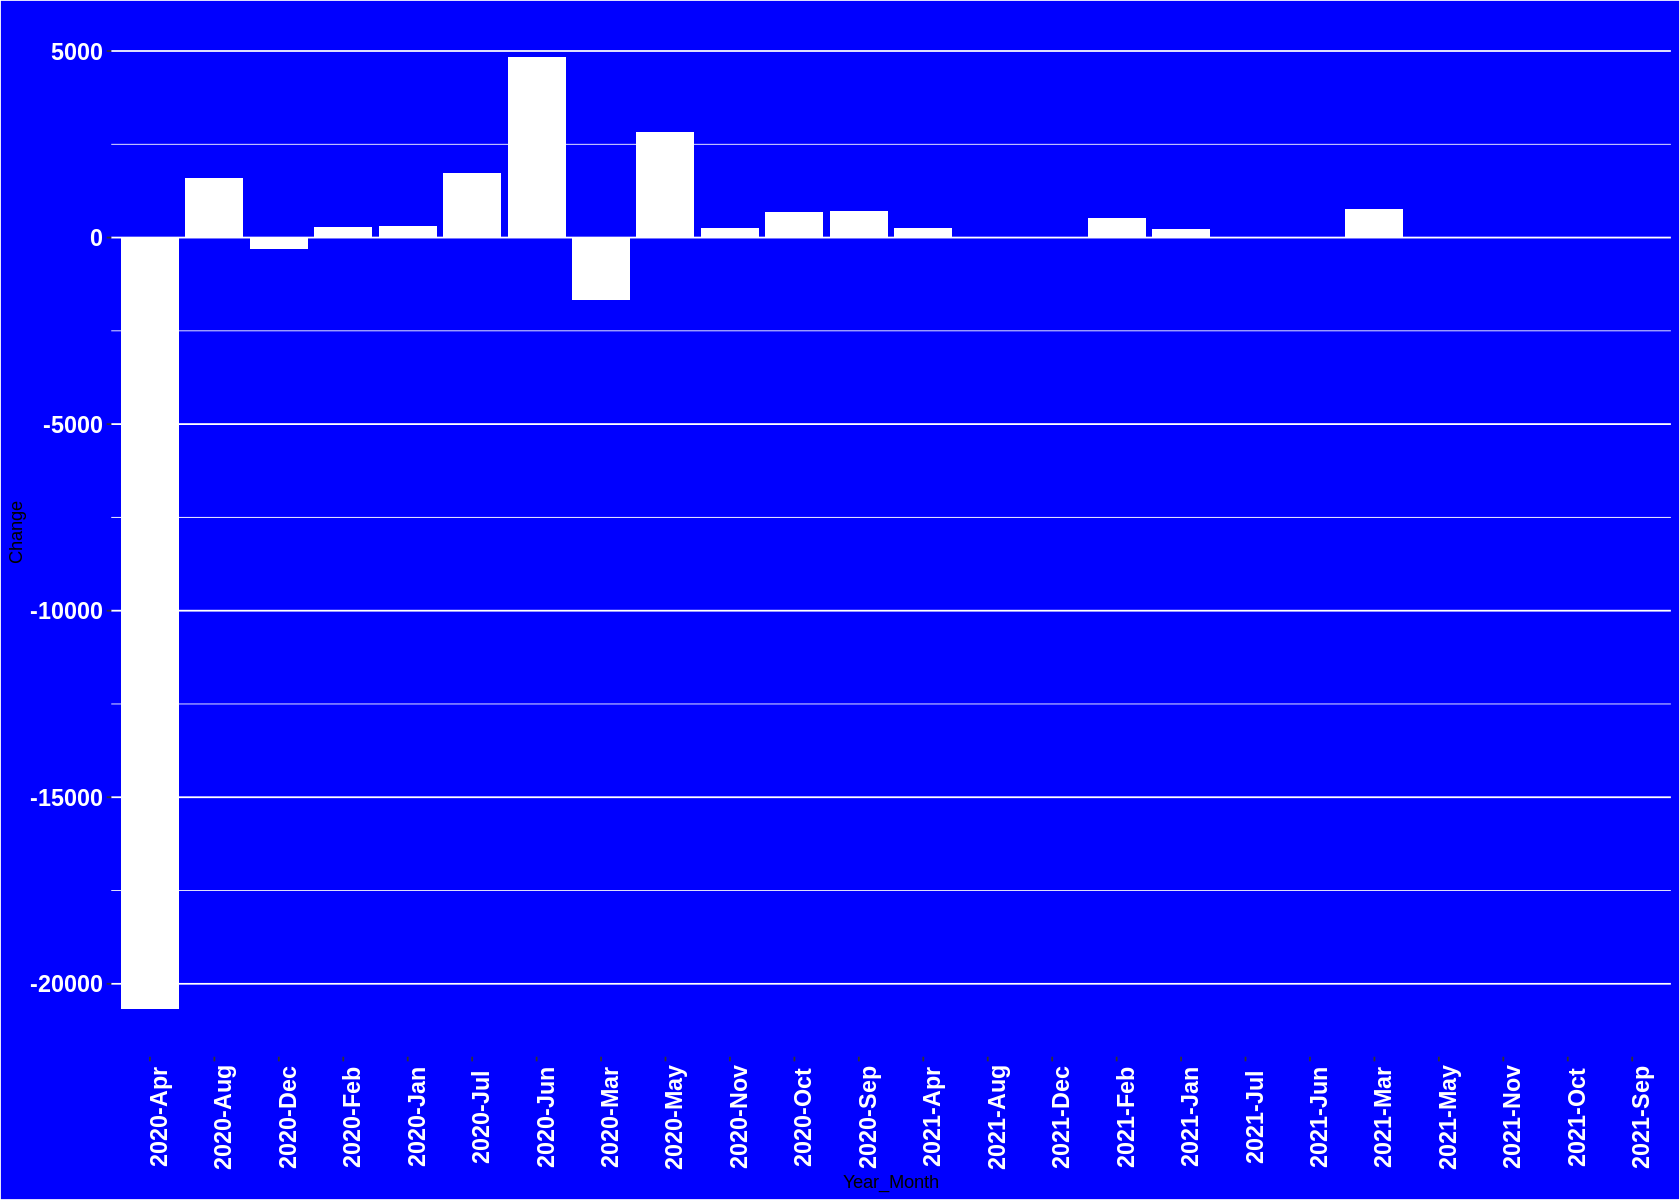

In [ ]:
job_change_graph_4 <- ggplot(data = recent_data,
                  aes( x = Year_Month , y = Change ))+
                  geom_bar(fill = "white" ,stat="identity")+
                  theme(plot.background = element_rect(fill = "blue"),
                      panel.background = element_rect(fill = "blue"))+
                      theme(axis.text.x = element_text(face="bold", color="white", 
                           size=14, angle=90),
          axis.text.y = element_text(face="bold", color="white", 
                           size=14, angle=0))+theme( # remove the vertical grid lines
           panel.grid.major.x = element_blank() ,
           panel.grid.minor.x = element_blank())
job_change_graph_4

add title

Warning message:
“Removed 8 rows containing missing values (position_stack).”


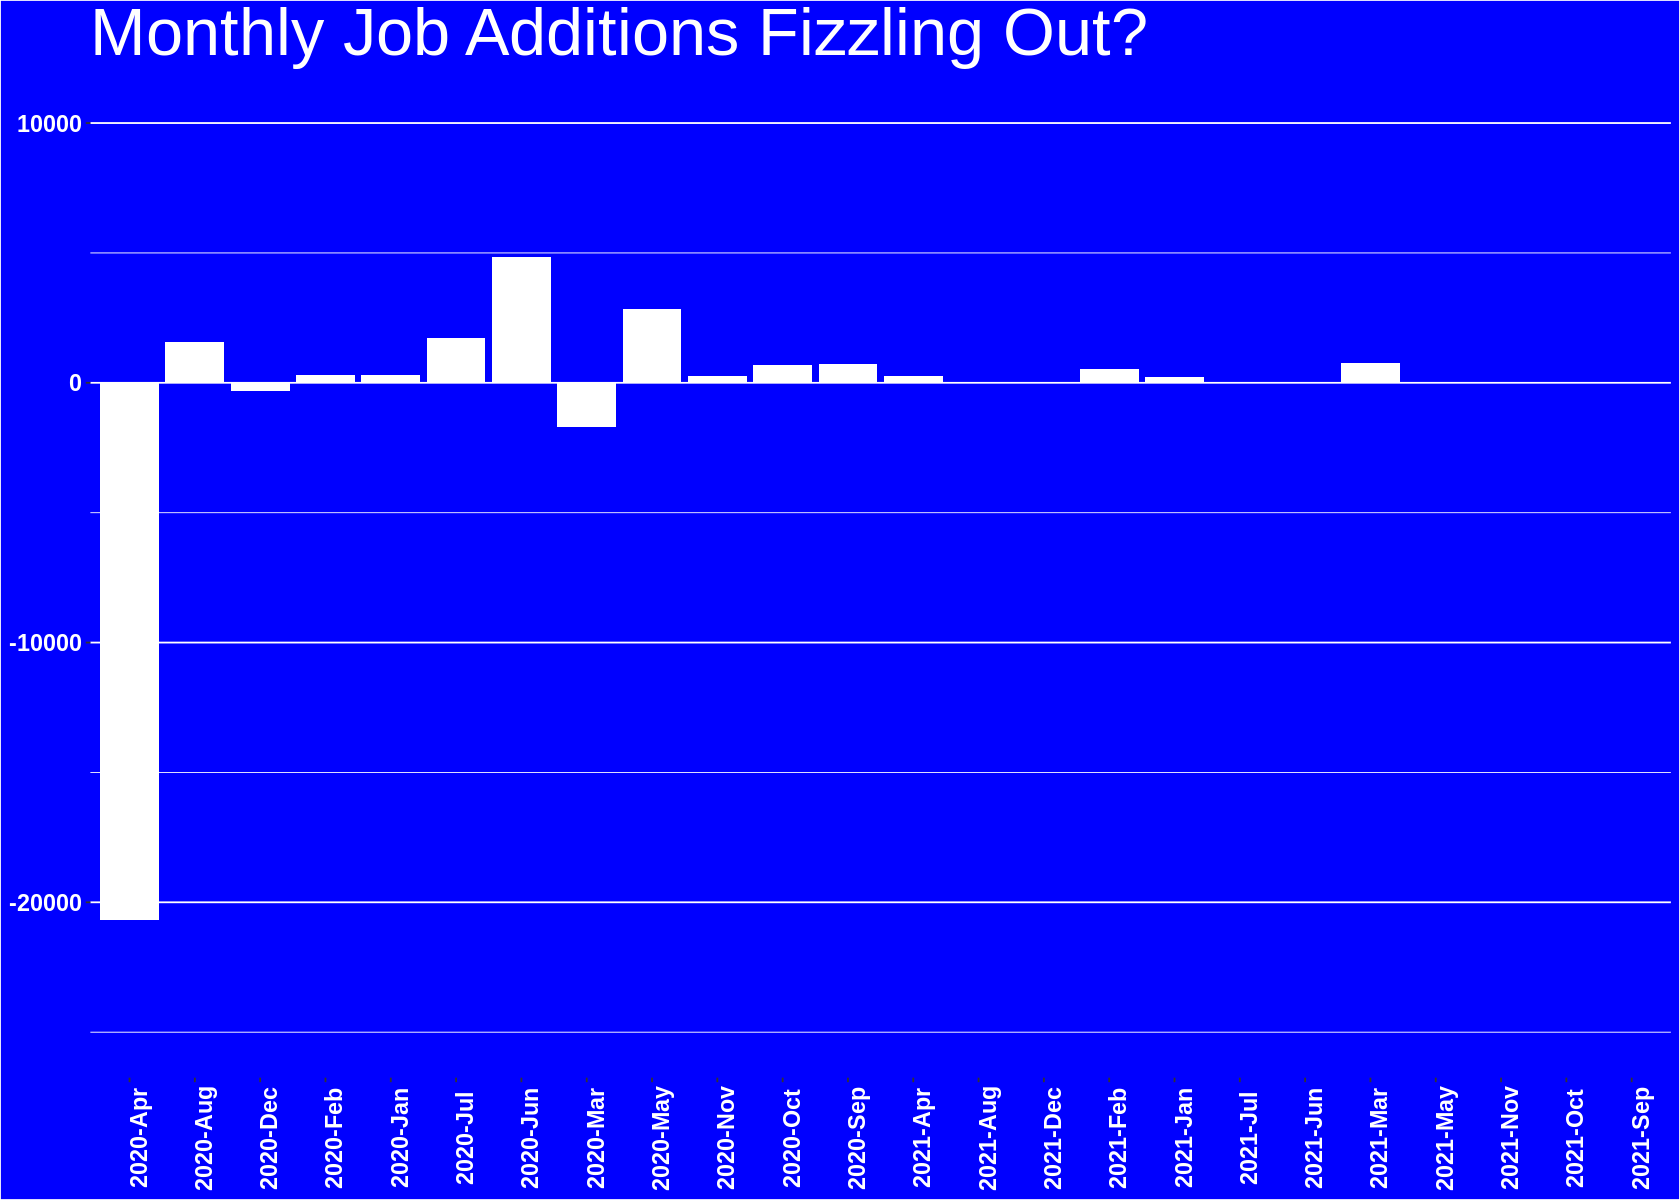

In [ ]:
job_change_graph_5 <- ggplot(data = recent_data,
                  aes( x = Year_Month , y = Change ))+
                  geom_bar(fill = "white" ,stat="identity")+
                  theme(plot.background = element_rect(fill = "blue"),
                      panel.background = element_rect(fill = "blue"))+
                      theme(axis.text.x = element_text(face="bold", color="white", 
                           size=14, angle=90),
          axis.text.y = element_text(face="bold", color="white", 
                           size=14, angle=0))+theme( # remove the vertical grid lines
           panel.grid.major.x = element_blank() ,
           panel.grid.minor.x = element_blank())+
           ggtitle('Monthly Job Additions Fizzling Out?')+
           theme(plot.title = element_text(color = 'white', size = 40))+
           ylim(-25000,10000)+
           theme(axis.title.y = element_blank())+
           theme(axis.title.x = element_blank())
job_change_graph_5

# Notes

# Options

In [ ]:
options(scipen=999)
options(repr.plot.width=14, repr.plot.height=10)

#Packages

In [ ]:
install.packages('zoo')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidyverse)
library(ggplot2)
library(lubridate)
library(repr)
library(scales)
library(zoo)


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




# Data Import

In [ ]:
data <- read.csv('/content/Monthly_Job_Additions.csv')

In [ ]:
head(data,3)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2011,19,212,235,314,101,236,60,126,233,204,132,202
2,2012,354,262,240,82,100,73,152,172,187,159,156,239
3,2013,191,278,139,191,222,181,112,242,187,225,264,69


# Pre- Process

In [ ]:
data.long <- pivot_longer(data, cols= 2:13, names_to = "Month", values_to = "Change")

In [ ]:
head(data.long,6)

Year,Month,Change
<int>,<chr>,<int>
2011,Jan,19
2011,Feb,212
2011,Mar,235
2011,Apr,314
2011,May,101
2011,Jun,236


In [ ]:
str(data.long)

tibble[,4] [132 × 4] (S3: tbl_df/tbl/data.frame)
 $ Year      : int [1:132] 2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ Month     : chr [1:132] "Jan" "Feb" "Mar" "Apr" ...
 $ Change    : int [1:132] 19 212 235 314 101 236 60 126 233 204 ...
 $ Year_Month: chr [1:132] "2011-Jan" "2011-Feb" "2011-Mar" "2011-Apr" ...


In [ ]:
#data.long$Month <- as.factor(data.long$Month)

In [ ]:
head(data.long)

In [ ]:
A<- as.Date(paste("-01" ,x, sep" "), format "%Y-%m-%d")

ERROR: ignored

In [ ]:
data.long$Year_Month <- paste(data.long$Year , data.long$Month , sep="-")

In [ ]:
head(data.long)

Year,Month,Change,Year_Month
<int>,<chr>,<int>,<chr>
2011,Jan,19,2011-Jan
2011,Feb,212,2011-Feb
2011,Mar,235,2011-Mar
2011,Apr,314,2011-Apr
2011,May,101,2011-May
2011,Jun,236,2011-Jun


Let us look only at datas since January 2020

In [ ]:
A<- lubridate::ymd(paste0(Year_Month = year_month, day = '01'))


ERROR: ignored

In [ ]:
head(A)

In [ ]:
recent_data<- data.long %>%
          filter(Year >= 2020)